In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv
import math

from matplotlib.ticker import AutoMinorLocator

In [2]:
count = 6
x = []
y = [[] for i in range(count + 1)]
su = [[] for i in range(count + 1)]

alpha = 1

with open('/home/amir/repos/FGPRS/results/speedup.csv', 'r') as file:
    dummy = csv.reader(file)

    for row in dummy:        
        x.append(float(row[0]))
        
        for i in range(1, count + 1):
            if len(y[i - 1]) > 1:
                y[i - 1].append(float(row[i]) * alpha + y[i - 1][-1] * (1 - alpha))
            else:
                y[i - 1].append(float(row[i]))

def toSpeedup(x):
    y = []
#     f = min(math.pow(2 * x[0] / x[1] * x[0] / x[1], 1 / 3), 2) * x[0]
    f = min(math.pow(2 * x[0] / x[1], 1 / 2), 2) * x[0]
#     f = min((x[0] / x[1] + 2) / 2, 2) * x[0]
#     f = 2 * x[0]
    g = 2
    
    for d in x:
        y.append(min(f / d, g))
        g = g + 2
    
    return y

for i in range(count):
    su[i] = toSpeedup(y[i])

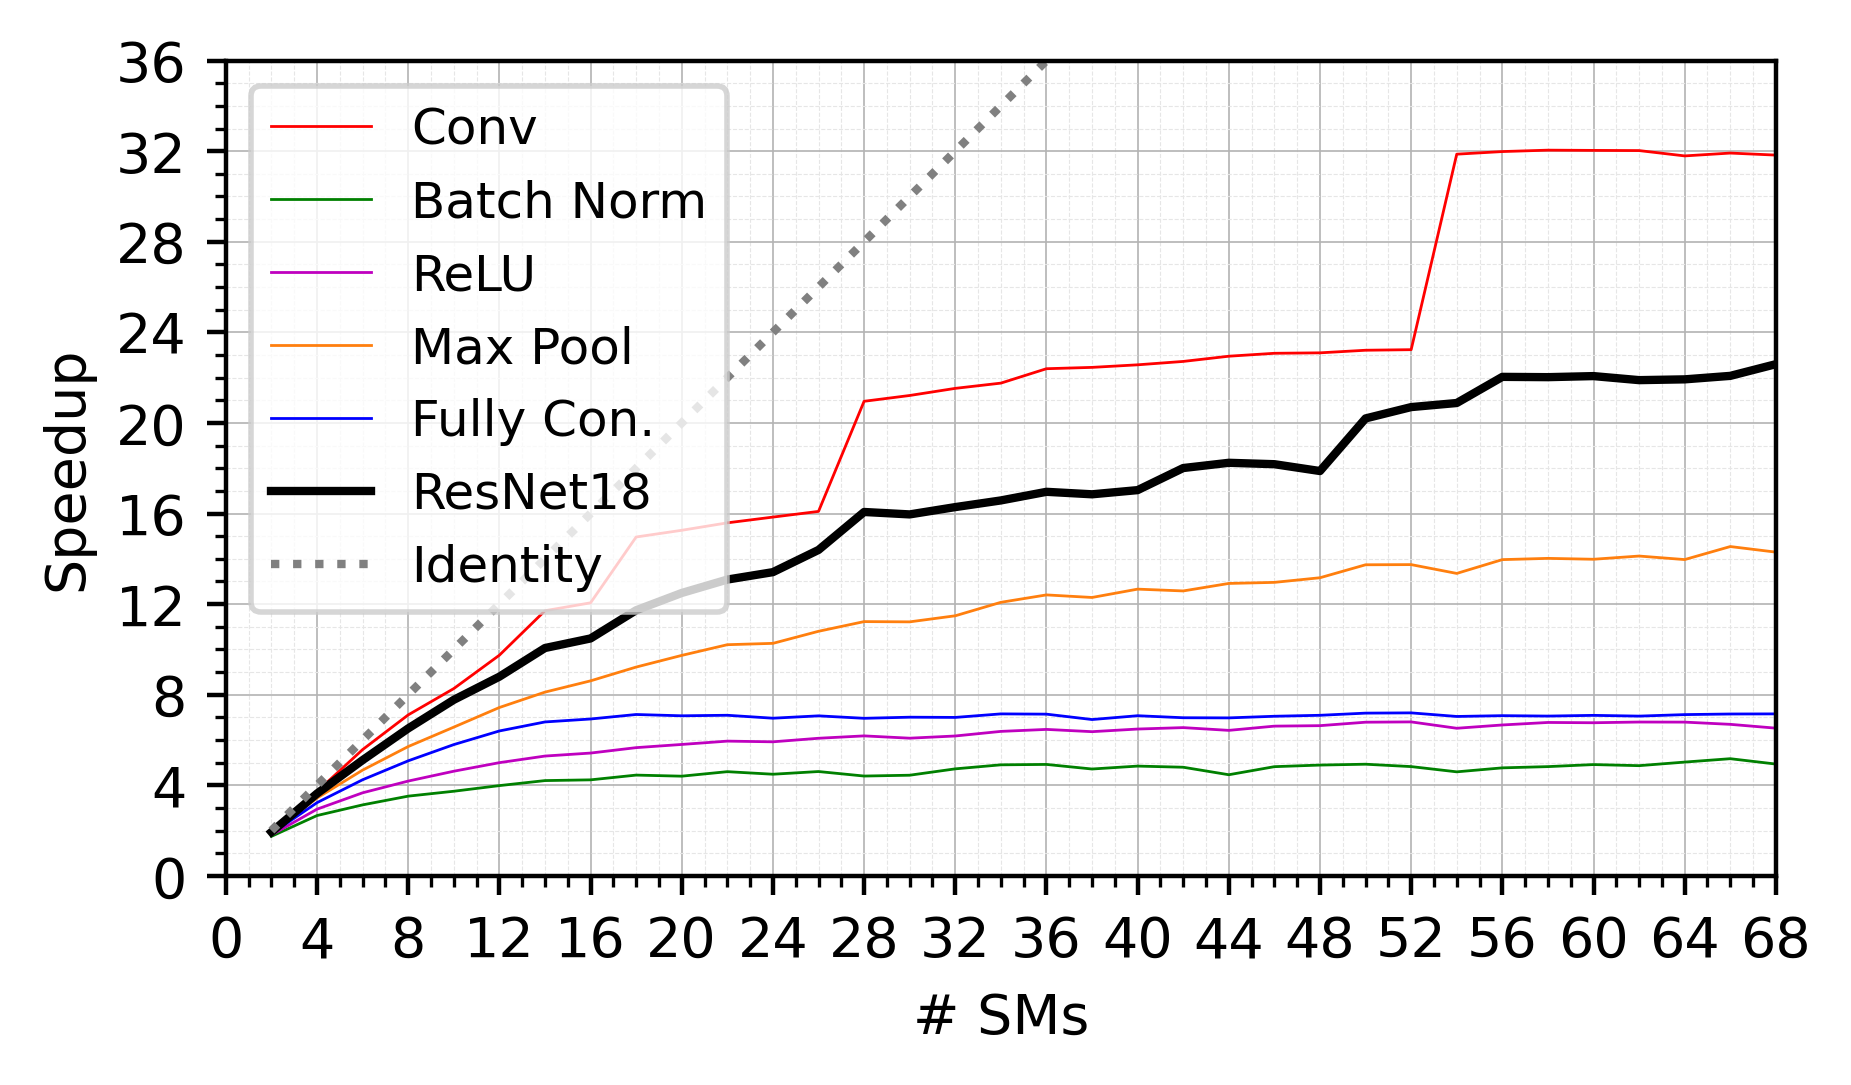

In [3]:
height = 36
plt.figure(figsize=(5, 5 * height / 68), dpi= 400)

plt.plot(x, su[0], color='r', linewidth=0.5)
plt.plot(x, su[2], color='g', linewidth=0.5)
plt.plot(x, su[3], color='m', linewidth=0.5)
plt.plot(x, su[4], color='tab:orange', linestyle='-', linewidth=0.5)
plt.plot(x, su[1], color='b', linestyle='-', linewidth=0.5)
plt.plot(x, su[5], color='k', linewidth=1.5)

id = []
for i in range(2, (len(x) * 2) + 1, 3):
    id.append(i)

plt.plot(id, id, linestyle ='dotted', color='0.5')
xticks = list(range(0, 69, 4))

plt.xticks(xticks)
plt.yticks(range(0, 69, 4))

plt.xlim(0, 68)
plt.ylim(0, height)

plt.grid(visible=True, which='minor', color='0.9', linestyle='--', linewidth=0.2)
plt.grid(visible=True, which='major', color='0.7', linestyle='-', linewidth=0.3)

plt.xlabel('# SMs')
plt.ylabel('Speedup')

plt.minorticks_on()

plt.legend([
    'Conv',
    'Batch Norm',
    'ReLU',
    'Max Pool',
    'Fully Con.',
    'ResNet18',
    'Identity']
    , prop={'size': 9}, loc='upper left')
plt.show()

[5, 10, 15, 20, 25, 30]
[1578.587, 827.766, 552.728, 433.671, 372.719, 316.35, 263.301, 255.681, 206.021, 202.024, 197.761, 194.592, 191.558, 147.113, 145.336, 143.212, 141.689, 137.664, 137.302, 136.613, 135.715, 134.352, 133.6, 133.486, 132.825, 132.682, 96.74, 96.392, 96.205, 96.237, 96.261, 96.974, 96.593, 96.865]


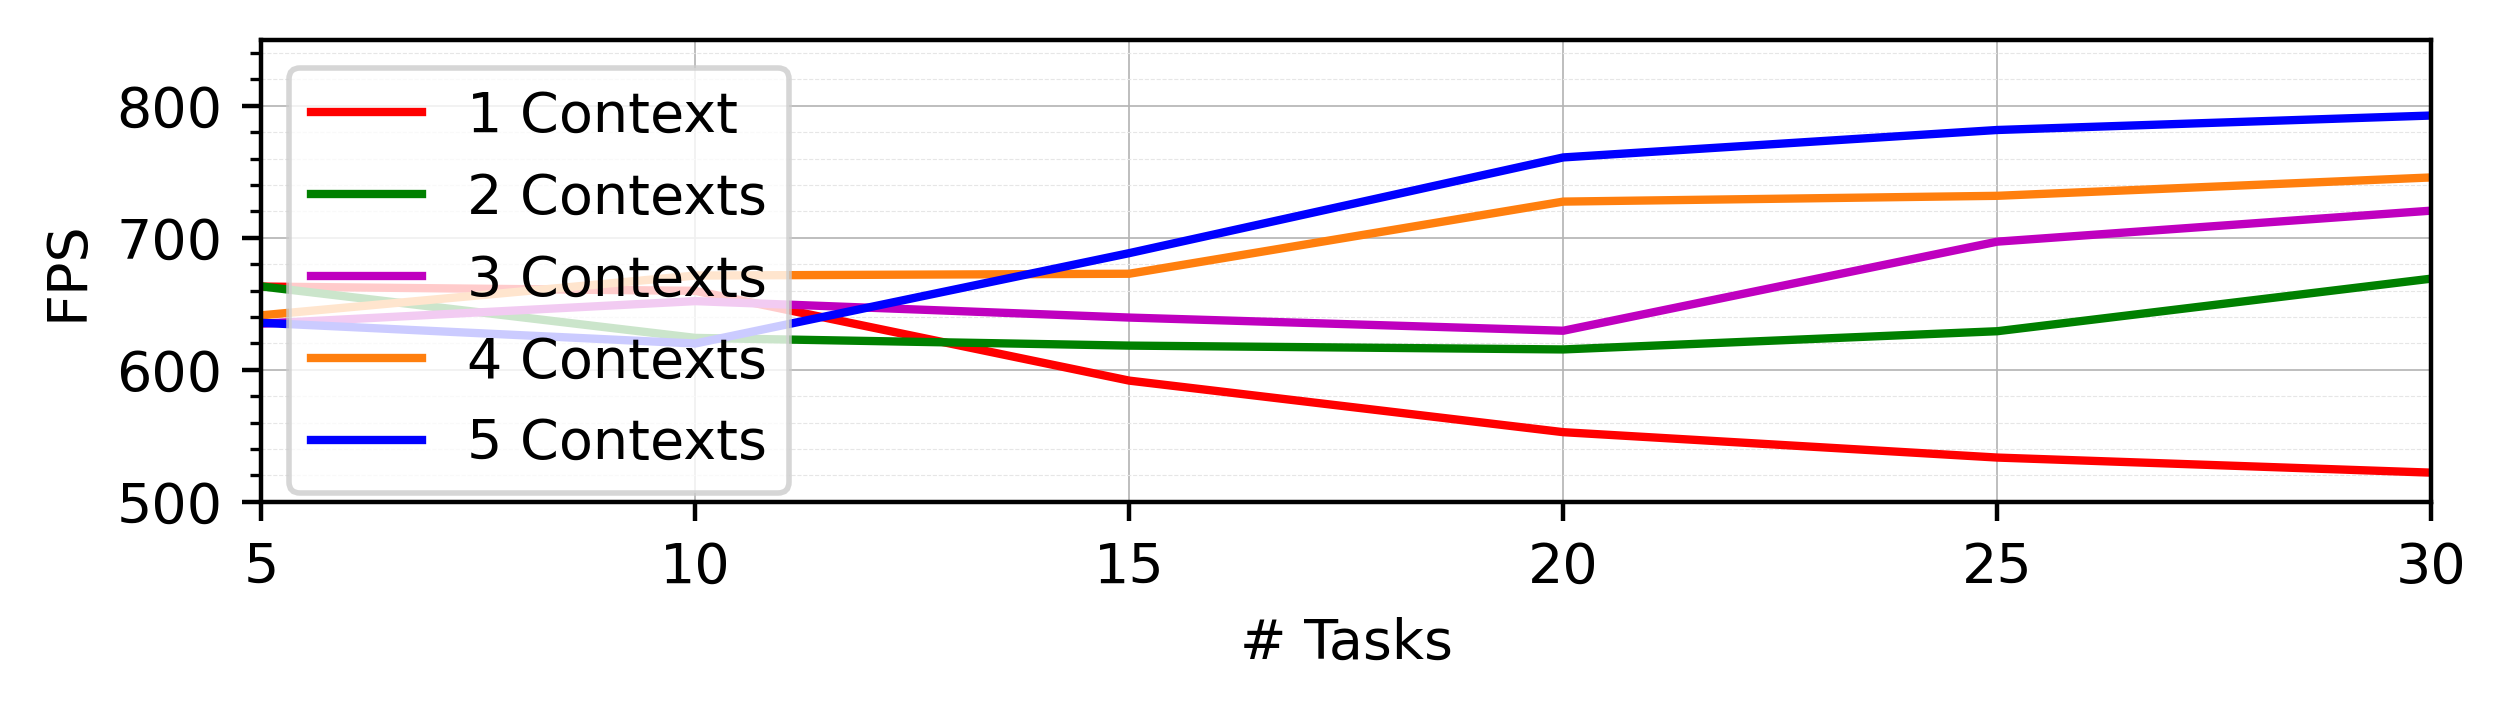

In [4]:
count = 5
x = list(range(5, 31, 5))
y1 = [[] for i in range(count)]

with open('/home/amir/repos/FGPRS/results/concurrency1 copy.csv', 'r') as file:
    dummy = csv.reader(file)
    index = 0
    
    for row in dummy:
        for i in range(1, len(x) + 1):
            y1[index].append(float(row[i]))
        
        index = index + 1
print(x)
print(y[0])
height = 36
plt.figure(figsize=(7, 1.5), dpi= 400)

plt.plot(x, y1[0], color='r')
plt.plot(x, y1[1], color='g')
plt.plot(x, y1[2], color='m')
plt.plot(x, y1[3], color='tab:orange')
plt.plot(x, y1[4], color='b')

xticks = list(range(5, 31, 5))

plt.xticks(xticks)
plt.yticks(range(500, 851, 100))

plt.xlim(5, 30)
plt.ylim(500, 850)

plt.grid(visible=True, which='minor', color='0.9', linestyle='--', linewidth=0.2)
plt.grid(visible=True, which='major', color='0.7', linestyle='-', linewidth=0.3)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.xlabel('# Tasks')
plt.ylabel('FPS')


plt.legend([
    '1 Context', '2 Contexts', '3 Contexts', '4 Contexts', '5 Contexts']
    , loc='upper left')
plt.show()

[5, 10, 15, 20, 25, 30]
[1578.587, 827.766, 552.728, 433.671, 372.719, 316.35, 263.301, 255.681, 206.021, 202.024, 197.761, 194.592, 191.558, 147.113, 145.336, 143.212, 141.689, 137.664, 137.302, 136.613, 135.715, 134.352, 133.6, 133.486, 132.825, 132.682, 96.74, 96.392, 96.205, 96.237, 96.261, 96.974, 96.593, 96.865]


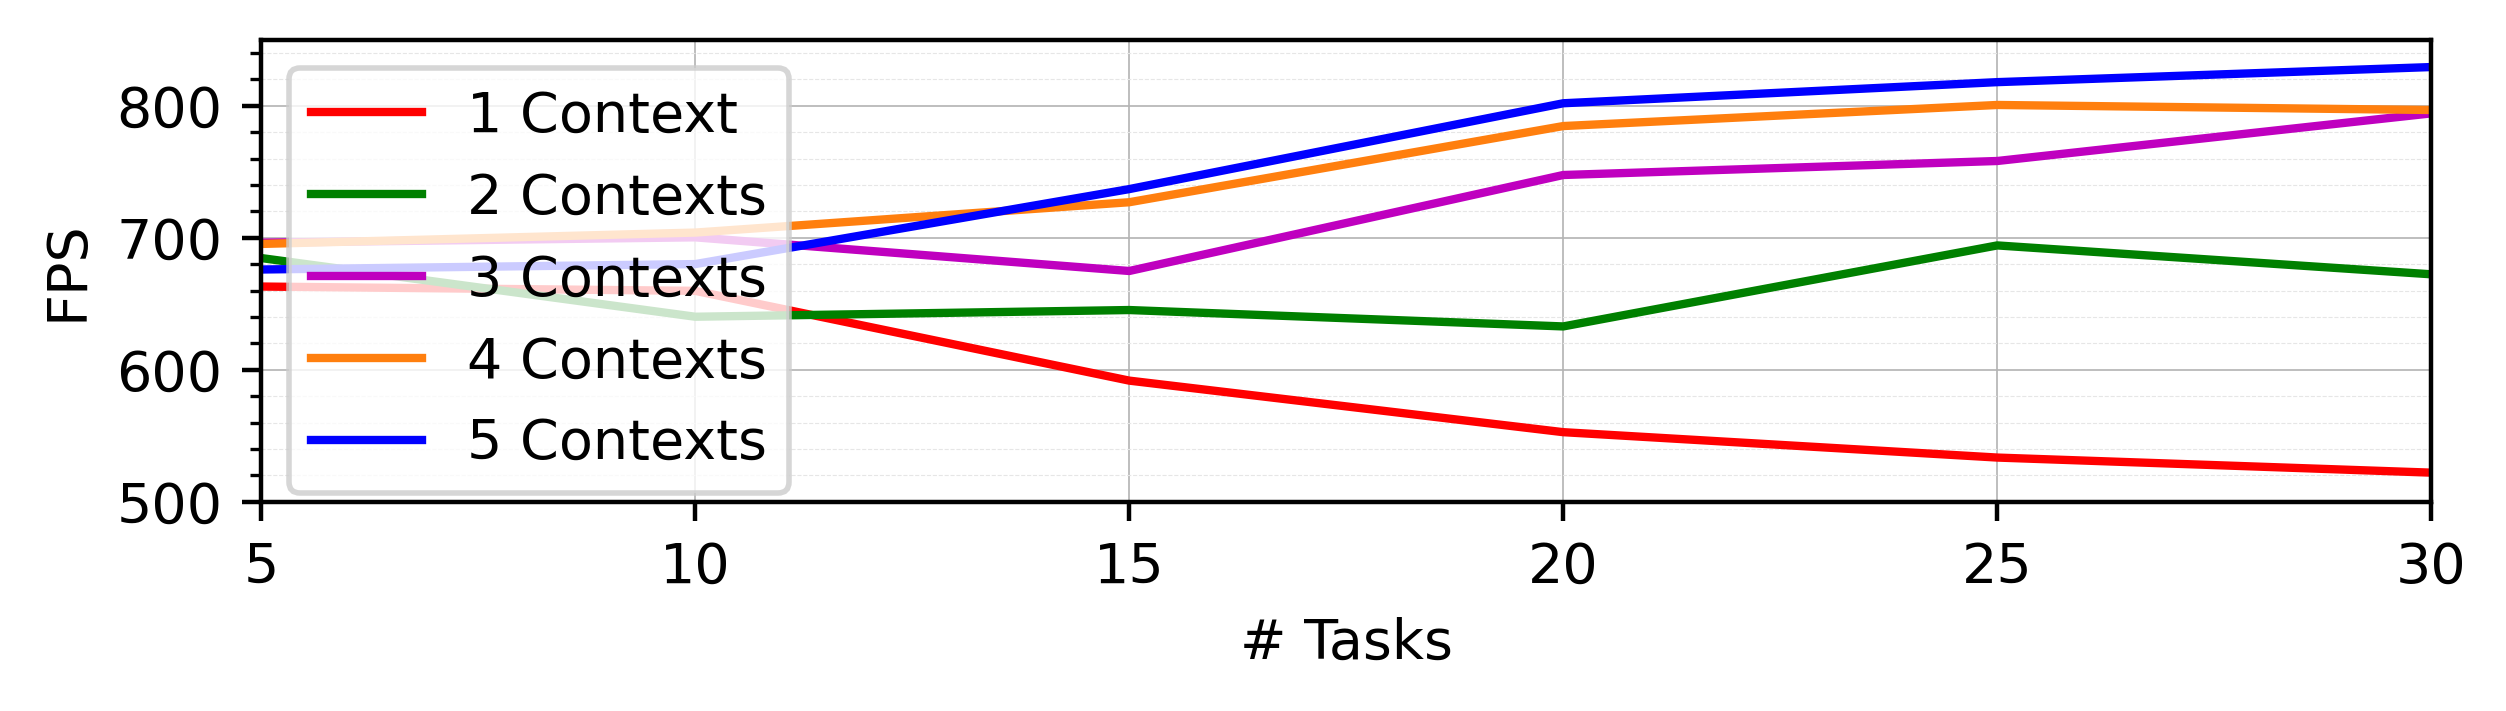

In [5]:
count = 5
x = list(range(5, 31, 5))
y2 = [[] for i in range(count)]

with open('/home/amir/repos/FGPRS/results/concurrency2 copy.csv', 'r') as file:
    dummy = csv.reader(file)
    index = 0
    
    for row in dummy:
        for i in range(1, len(x) + 1):
            y2[index].append(float(row[i]))
        
        index = index + 1
print(x)
print(y[0])
height = 36
plt.figure(figsize=(7, 1.5), dpi= 400)

plt.plot(x, y1[0], color='r')
plt.plot(x, y2[1], color='g')
plt.plot(x, y2[2], color='m')
plt.plot(x, y2[3], color='tab:orange')
plt.plot(x, y2[4], color='b')

xticks = list(range(5, 31, 5))

plt.xticks(xticks)
plt.yticks(range(500, 851, 100))

plt.xlim(5, 30)
plt.ylim(500, 850)

plt.grid(visible=True, which='minor', color='0.9', linestyle='--', linewidth=0.2)
plt.grid(visible=True, which='major', color='0.7', linestyle='-', linewidth=0.3)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.xlabel('# Tasks')
plt.ylabel('FPS')


plt.legend([
    '1 Context',
    '2 Contexts', '3 Contexts', '4 Contexts', '5 Contexts']
    , loc='upper left')
plt.show()

[5, 10, 15, 20, 25, 30]
[1578.587, 827.766, 552.728, 433.671, 372.719, 316.35, 263.301, 255.681, 206.021, 202.024, 197.761, 194.592, 191.558, 147.113, 145.336, 143.212, 141.689, 137.664, 137.302, 136.613, 135.715, 134.352, 133.6, 133.486, 132.825, 132.682, 96.74, 96.392, 96.205, 96.237, 96.261, 96.974, 96.593, 96.865]


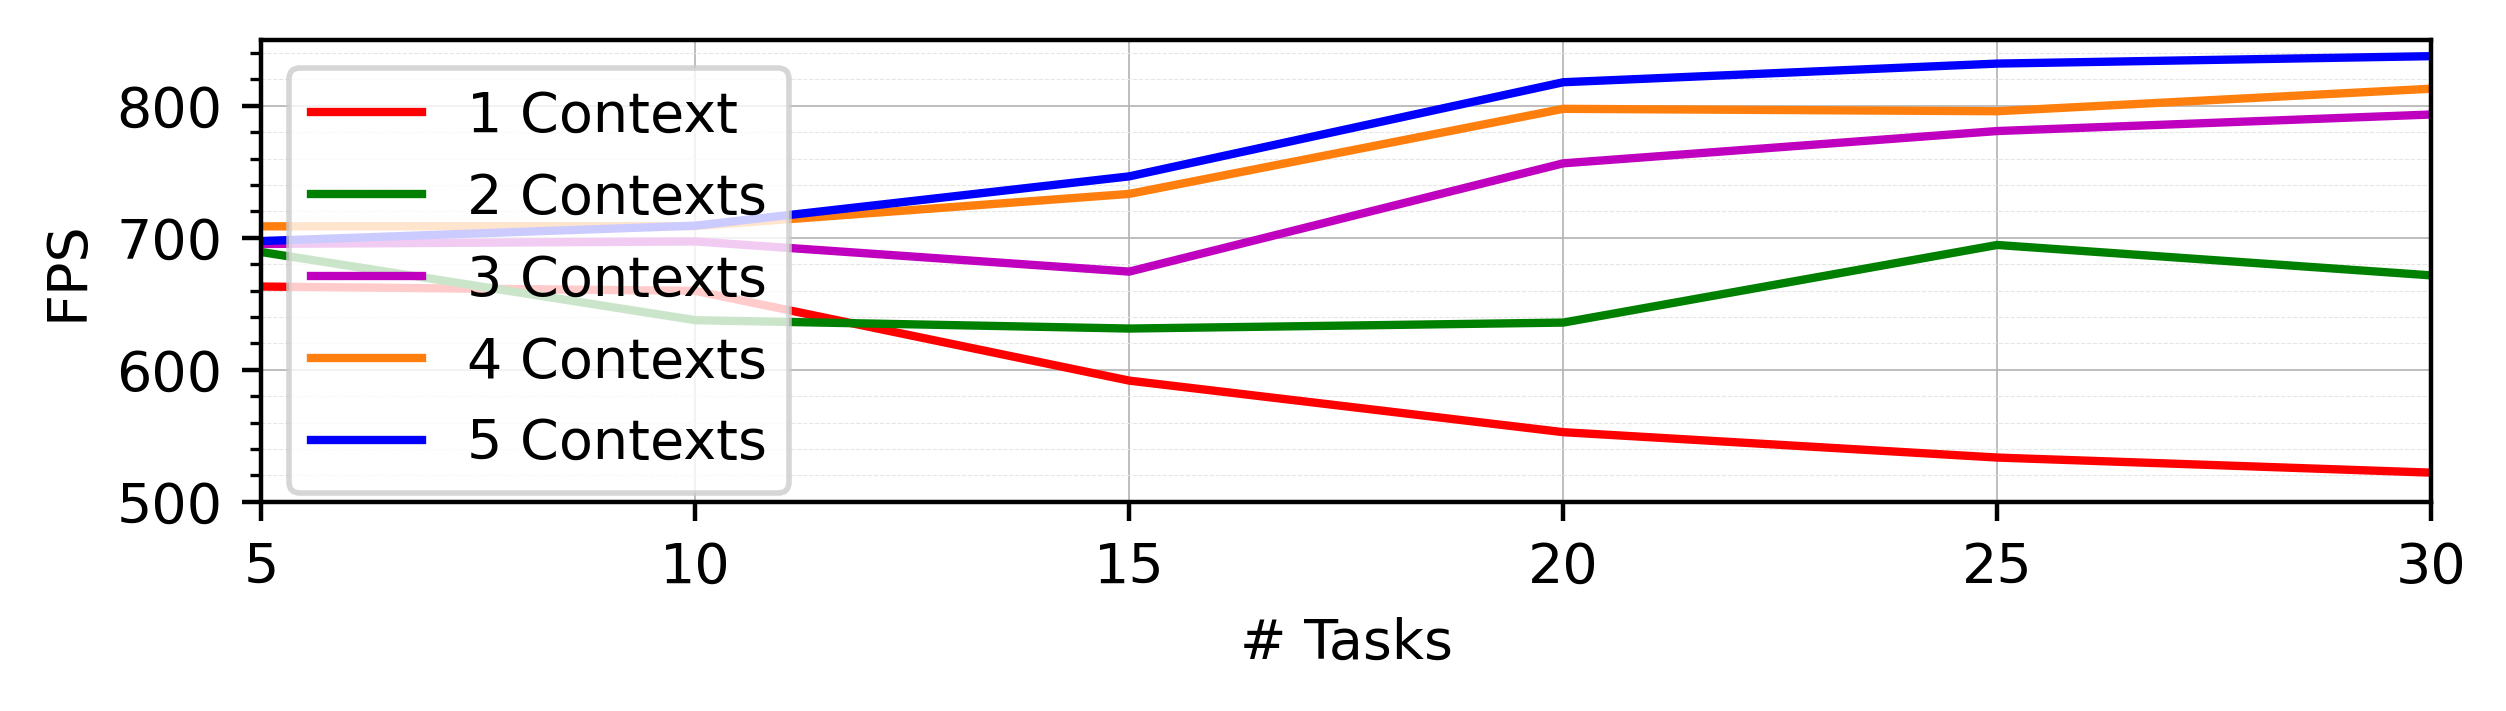

In [6]:
count = 5
x = list(range(5, 31, 5))
y3 = [[] for i in range(count)]

with open('/home/amir/repos/FGPRS/results/concurrency3 copy.csv', 'r') as file:
    dummy = csv.reader(file)
    index = 0
    
    for row in dummy:
        for i in range(1, len(x) + 1):
            y3[index].append(float(row[i]))
        
        index = index + 1
print(x)
print(y[0])
height = 36
plt.figure(figsize=(7, 1.5), dpi= 400)

plt.plot(x, y1[0], color='r')
plt.plot(x, y3[1], color='g')
plt.plot(x, y3[2], color='m')
plt.plot(x, y3[3], color='tab:orange')
plt.plot(x, y3[4], color='b')

xticks = list(range(5, 31, 5))

plt.xticks(xticks)
plt.yticks(range(500, 851, 100))

plt.xlim(5, 30)
plt.ylim(500, 850)

plt.grid(visible=True, which='minor', color='0.9', linestyle='--', linewidth=0.2)
plt.grid(visible=True, which='major', color='0.7', linestyle='-', linewidth=0.3)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.xlabel('# Tasks')
plt.ylabel('FPS')


plt.legend([
    '1 Context',
    '2 Contexts', '3 Contexts', '4 Contexts', '5 Contexts']
    , loc='upper left')
plt.show()

In [7]:
def extractData(count, mode, dist):
    directory = '/home/amir/repos/FGPRS/results/final/'
    
    if mode != 0 or dist != 0:
        modeString = '1.0x' if mode == 1 else ('1.5x' if mode == 2 else '2.0x')
        distString = 'Equal' if dist == 1 else 'Stepwise'

        compName = directory + str(count) + '/' + modeString + '_' + distString + '_' + 'Comp.csv.csv'
        missName = directory + str(count) + '/' + modeString + '_' + distString + '_' + 'Miss.csv.csv'
        
    else:

        compName = directory + str(count) + '/Naive_Comp.csv.csv'
        missName = directory + str(count) + '/Naive_Miss.csv.csv'
    
    with open(compName) as compFile:
        with open(missName) as missFile:
            compReader = next(csv.reader(compFile))
            missReader = next(csv.reader(missFile))
            
            x = list(range(15, 13 + len(compReader)))
            
            comp = [int(float(value)) * (index + 15) * 30 / 100 for index, value in enumerate(compReader[2:])]
#             comp = [int(float(value) for value in (compReader[2:])]
            miss = [int(float(value)) for value in (missReader[2:])]                
#             print(comp)
#             print(miss)
            return (x, comp, miss)

wdth = 1

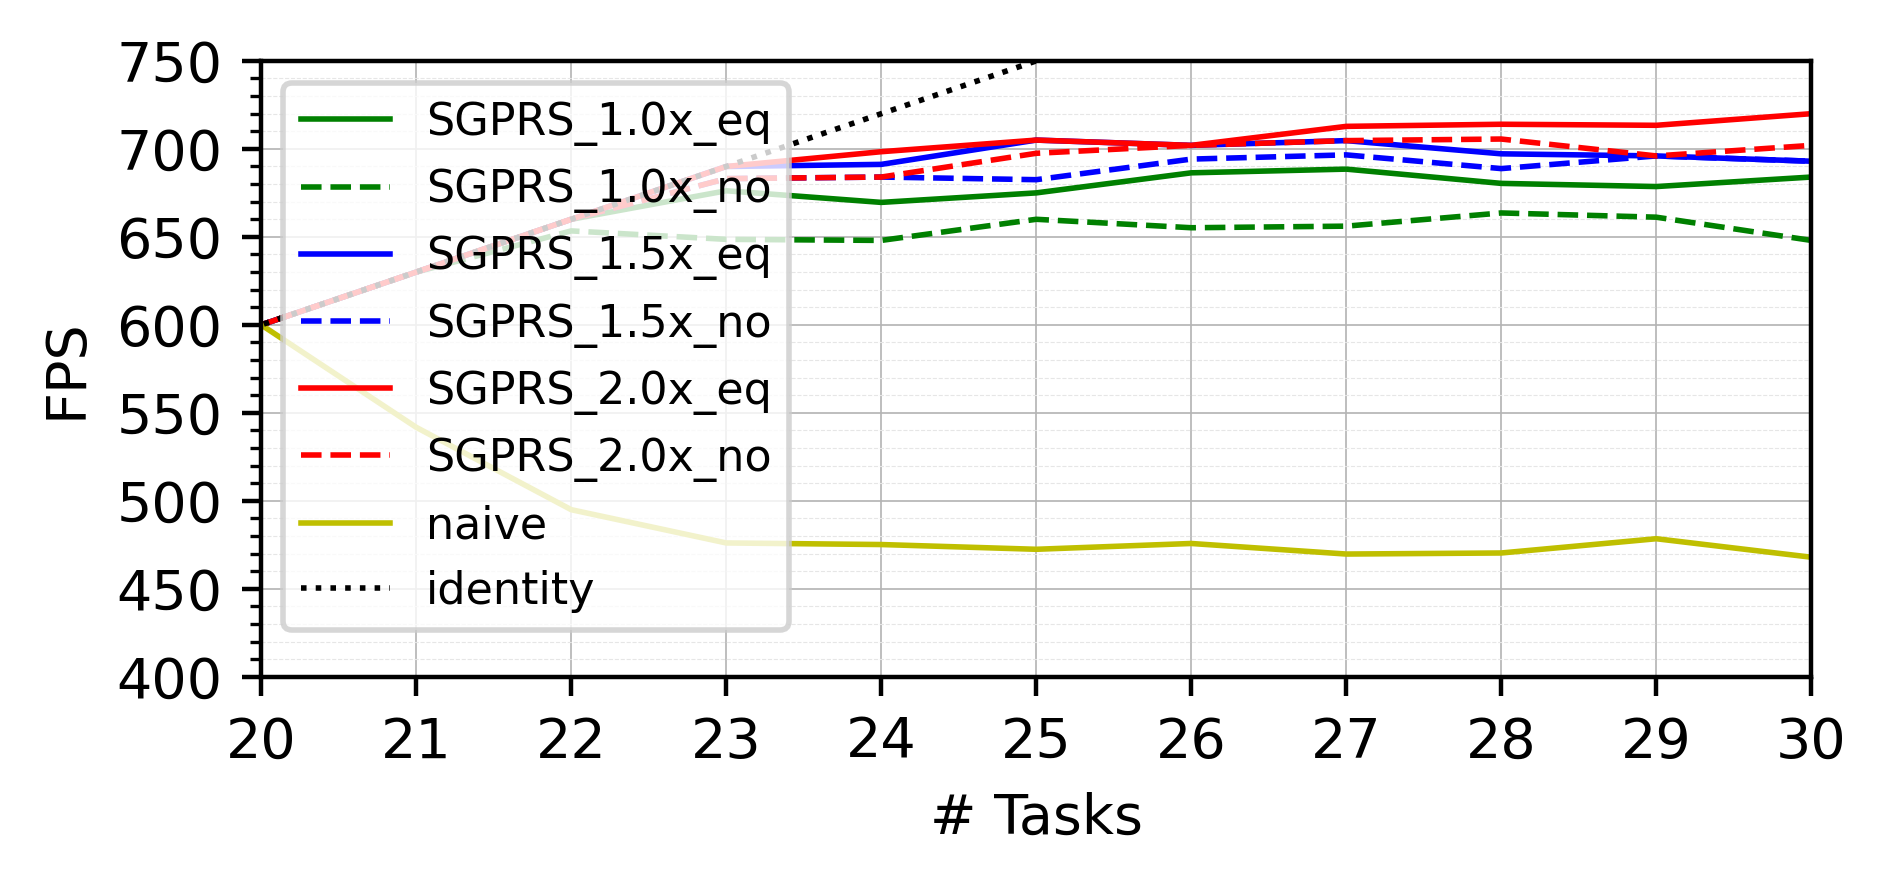

<Figure size 640x480 with 0 Axes>

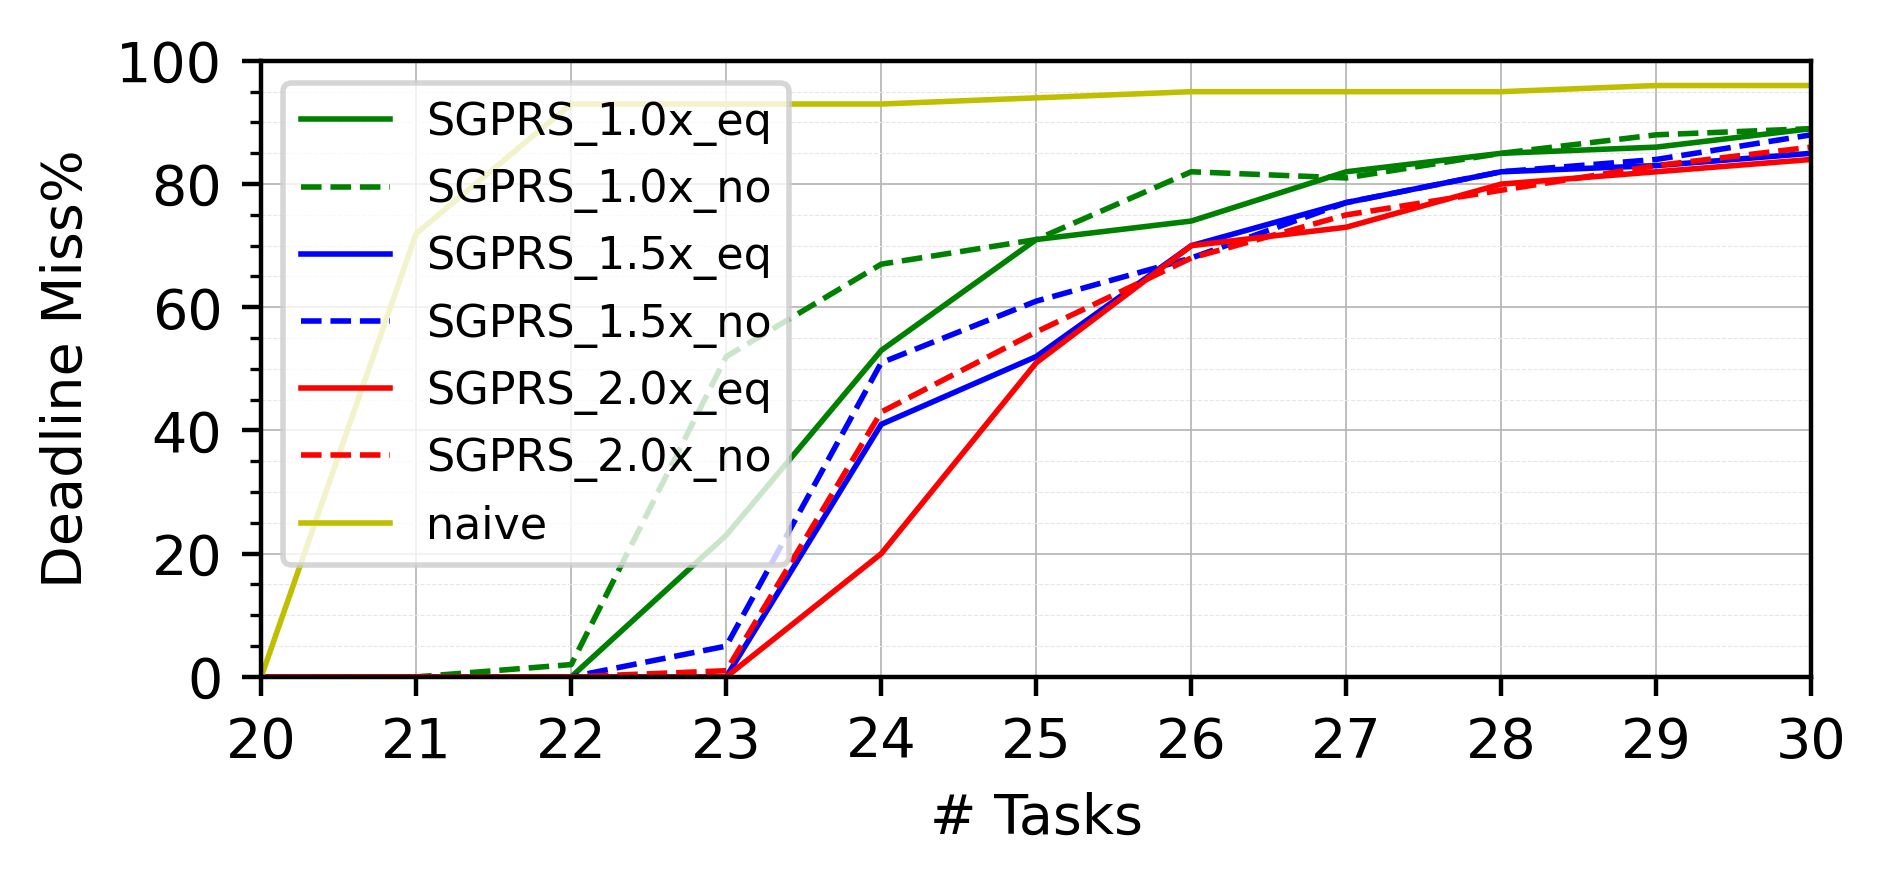

In [25]:
count = 2

(x11, c11, m11) = extractData(count, 1, 1)
(x12, c12, m12) = extractData(count, 1, 2)
(x21, c21, m21) = extractData(count, 2, 1)
(x22, c22, m22) = extractData(count, 2, 2)
(x31, c31, m31) = extractData(count, 3, 1)
(x32, c32, m32) = extractData(count, 3, 2)
(xna, cna, mna) = extractData(count, 0, 0)

plt.figure(figsize=(5, 2), dpi= 400)
# plt.subplot(1, 2, 1)

id = []

for i in range(15, 31):
    id.append(i * 30)

plt.plot(x11, c11, color='g', linestyle='-', linewidth=wdth)
plt.plot(x12, c12, color='g', linestyle='--', linewidth=wdth)
plt.plot(x21, c21, color='b', linestyle='-', linewidth=wdth)
plt.plot(x22, c22, color='b', linestyle='--', linewidth=wdth)
plt.plot(x31, c31, color='r', linestyle='-', linewidth=wdth)
plt.plot(x32, c32, color='r', linestyle='--', linewidth=wdth)
plt.plot(xna, cna, color='y', linestyle='-', linewidth=wdth)
plt.plot(list(range(15, 31)), id, color='k', linestyle=':', linewidth=wdth)

xticks = list(range(15, 31, 1))

plt.xticks(xticks)
plt.yticks(range(400, 851, 50))

plt.xlim(20, 30)
plt.ylim(400, 750)

plt.grid(visible=True, which='minor', color='0.9', linestyle='--', linewidth=0.2)
plt.grid(visible=True, which='major', color='0.7', linestyle='-', linewidth=0.3)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.xlabel('# Tasks')
plt.ylabel('FPS')

plt.legend([
    'SGPRS_1.0x_eq',
    'SGPRS_1.0x_no',
    'SGPRS_1.5x_eq',
    'SGPRS_1.5x_no',
    'SGPRS_2.0x_eq',
    'SGPRS_2.0x_no',
    'naive',
    'identity'
],
    prop={'size': 8}, loc='upper left')

# plt.subplot(1, 2, 2)
plt.figure()
plt.figure(figsize=(5, 2), dpi= 400)

plt.plot(x11, m11, color='g', linestyle='-', linewidth=wdth)
plt.plot(x12, m12, color='g', linestyle='--', linewidth=wdth)
plt.plot(x21, m21, color='b', linestyle='-', linewidth=wdth)
plt.plot(x22, m22, color='b', linestyle='--', linewidth=wdth)
plt.plot(x31, m31, color='r', linestyle='-', linewidth=wdth)
plt.plot(x32, m32, color='r', linestyle='--', linewidth=wdth)
plt.plot(xna, mna, color='y', linestyle='-', linewidth=wdth)

# xticks = list(range(15, 31, 5))

plt.xticks(xticks)
plt.yticks(range(0, 101, 20))

plt.xlim(20, 30)
plt.ylim(0, 100)

plt.grid(visible=True, which='minor', color='0.9', linestyle='--', linewidth=0.2)
plt.grid(visible=True, which='major', color='0.7', linestyle='-', linewidth=0.3)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.xlabel('# Tasks')
plt.ylabel('Deadline Miss%')

plt.legend([
    'SGPRS_1.0x_eq',
    'SGPRS_1.0x_no',
    'SGPRS_1.5x_eq',
    'SGPRS_1.5x_no',
    'SGPRS_2.0x_eq',
    'SGPRS_2.0x_no',
    'naive'
],
    prop={'size': 8}, loc='upper left')

# plt.show()

In [26]:
print(cna[-1])
print(max(cna))
print(max(c11))
print(max(c12))
print(max(c21))
print(max(c22))
print(max(c31))
print(max(c32))

468.0
600.0
688.5
663.6
705.0
696.6
720.0
705.6


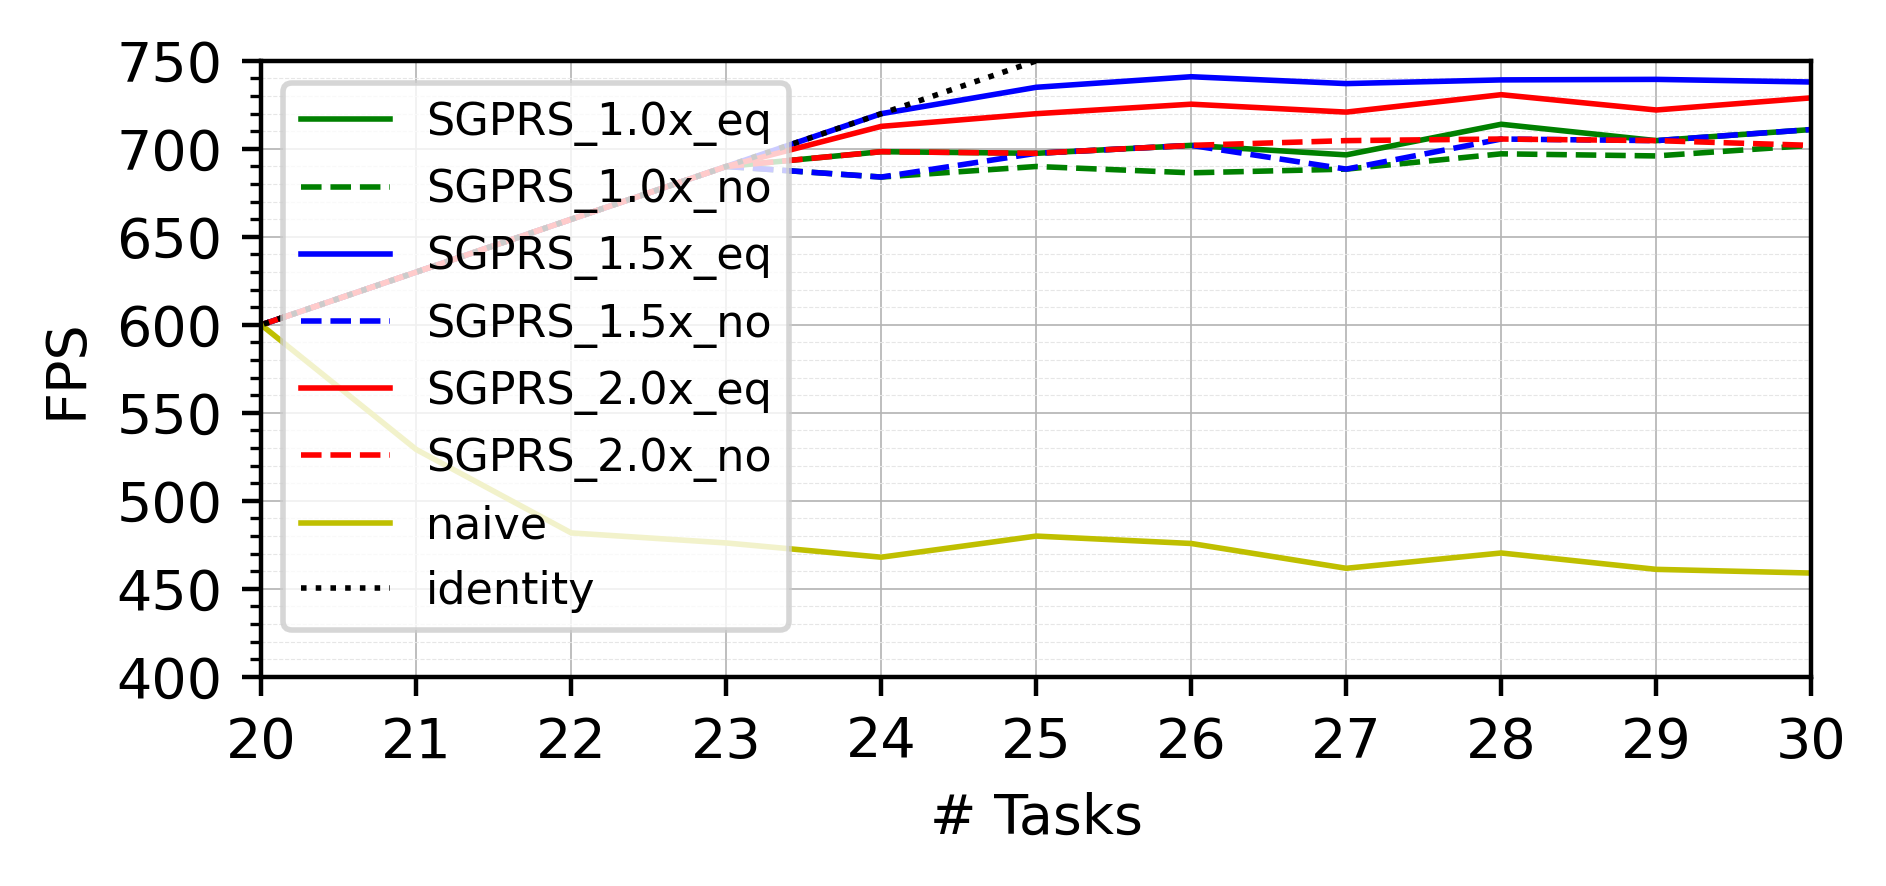

<Figure size 640x480 with 0 Axes>

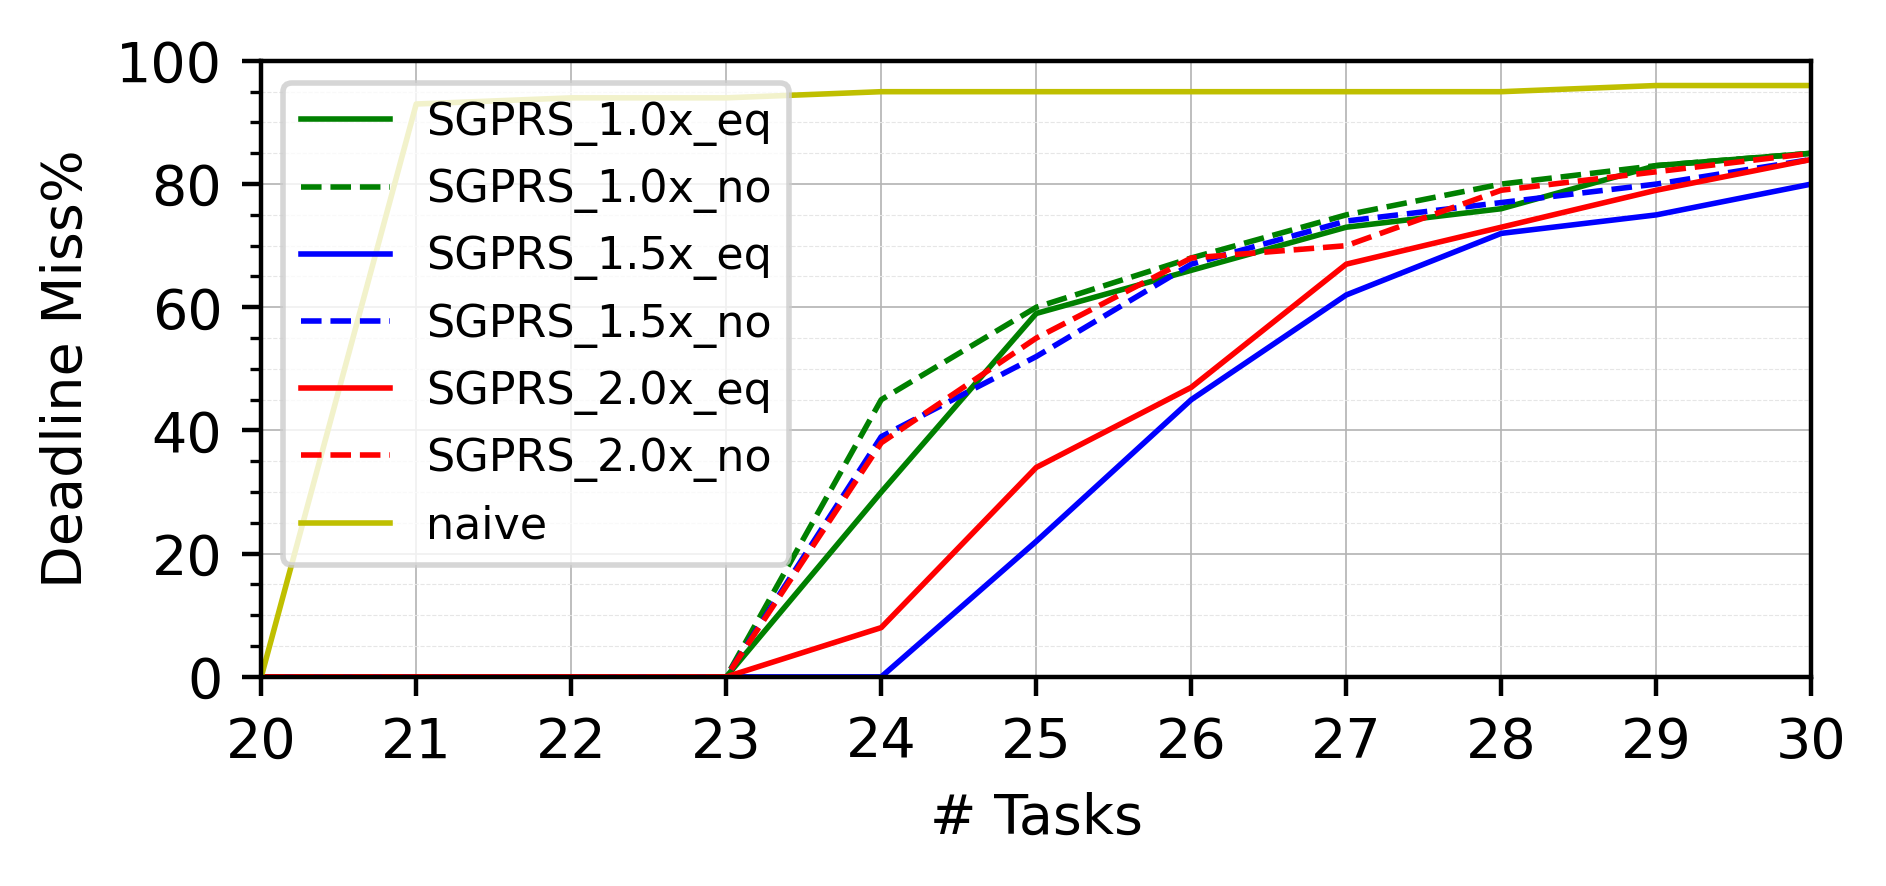

In [27]:
count = 3

(x11, c11, m11) = extractData(count, 1, 1)
(x12, c12, m12) = extractData(count, 1, 2)
(x21, c21, m21) = extractData(count, 2, 1)
(x22, c22, m22) = extractData(count, 2, 2)
(x31, c31, m31) = extractData(count, 3, 1)
(x32, c32, m32) = extractData(count, 3, 2)
(xna, cna, mna) = extractData(count, 0, 0)

plt.figure(figsize=(5, 2), dpi= 400)
# plt.subplot(1, 2, 1)

id = []

for i in range(15, 31):
    id.append(i * 30)

plt.plot(x11, c11, color='g', linestyle='-', linewidth=wdth)
plt.plot(x12, c12, color='g', linestyle='--', linewidth=wdth)
plt.plot(x21, c21, color='b', linestyle='-', linewidth=wdth)
plt.plot(x22, c22, color='b', linestyle='--', linewidth=wdth)
plt.plot(x31, c31, color='r', linestyle='-', linewidth=wdth)
plt.plot(x32, c32, color='r', linestyle='--', linewidth=wdth)
plt.plot(xna, cna, color='y', linestyle='-', linewidth=wdth)
plt.plot(list(range(15, 31)), id, color='k', linestyle=':', linewidth=wdth)

xticks = list(range(15, 31, 1))

plt.xticks(xticks)
plt.yticks(range(400, 851, 50))

plt.xlim(20, 30)
plt.ylim(400, 750)

plt.grid(visible=True, which='minor', color='0.9', linestyle='--', linewidth=0.2)
plt.grid(visible=True, which='major', color='0.7', linestyle='-', linewidth=0.3)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.xlabel('# Tasks')
plt.ylabel('FPS')

plt.legend([
    'SGPRS_1.0x_eq',
    'SGPRS_1.0x_no',
    'SGPRS_1.5x_eq',
    'SGPRS_1.5x_no',
    'SGPRS_2.0x_eq',
    'SGPRS_2.0x_no',
    'naive',
    'identity'
],
    prop={'size': 8}, loc='upper left')

# plt.subplot(1, 2, 2)
plt.figure()
plt.figure(figsize=(5, 2), dpi= 400)

plt.plot(x11, m11, color='g', linestyle='-', linewidth=wdth)
plt.plot(x12, m12, color='g', linestyle='--', linewidth=wdth)
plt.plot(x21, m21, color='b', linestyle='-', linewidth=wdth)
plt.plot(x22, m22, color='b', linestyle='--', linewidth=wdth)
plt.plot(x31, m31, color='r', linestyle='-', linewidth=wdth)
plt.plot(x32, m32, color='r', linestyle='--', linewidth=wdth)
plt.plot(xna, mna, color='y', linestyle='-', linewidth=wdth)

# xticks = list(range(15, 31, 5))

plt.xticks(xticks)
plt.yticks(range(0, 101, 20))

plt.xlim(20, 30)
plt.ylim(0, 100)

plt.grid(visible=True, which='minor', color='0.9', linestyle='--', linewidth=0.2)
plt.grid(visible=True, which='major', color='0.7', linestyle='-', linewidth=0.3)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.xlabel('# Tasks')
plt.ylabel('Deadline Miss%')

plt.legend([
    'SGPRS_1.0x_eq',
    'SGPRS_1.0x_no',
    'SGPRS_1.5x_eq',
    'SGPRS_1.5x_no',
    'SGPRS_2.0x_eq',
    'SGPRS_2.0x_no',
    'naive'
],
    prop={'size': 8}, loc='upper left')

# plt.show()

In [29]:
print(cna[-1])
print(max(cna))
print(max(c11))
print(max(c12))
print(max(c21))
print(max(c22))
print(max(c31))
print(max(c32))
print(m21[-1])

459.0
600.0
714.0
702.0
741.0
711.0
730.8
705.6
80
